<a href="https://colab.research.google.com/github/kasidejcha/NLP_kaggle_disaster_competition/blob/main/nlp_kaggle_disaster_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-9684cd1d-6b4d-8526-6d6f-daf85b803695)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-10-01 04:14:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-01 04:14:53 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

Dataset: Kaggle's introduction to NLP dataset (text samples of tweets labelled as disaster or not disaster)

Link: https://www.kaggle.com/c/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data('nlp_getting_started.zip')

--2021-10-01 04:14:55--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-10-01 04:14:56 (137 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
# read in the text data
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # pandas shuffle
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts() # balanced dataset

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training example
import random
random_index = random.randint(0,len(train_df)-5) # create random indexes not higher than highest number of row
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 1 (real disaster)
Text:
Burned dog finds new home with young burn victim http://t.co/Pqrjvgvgxg

---

Target: 0 (not real disaster)
Text:
This is a tragedy: I added the wrong book to my TBR list now I can't find the right one. This is what comes of browsing just on gr homepage.

---

Target: 0 (not real disaster)
Text:
I keep scrolling to find out what he said or did....but there seems to be no exact starting point.  Wounds run deep. : /

---

Target: 0 (not real disaster)
Text:
@laevantine Fortunately I reworked the plumbing on my emergency chemical shower to draw from the glitter pipe for just such an occasion

---

Target: 1 (real disaster)
Text:
@PyramidHead76 one good thing came out of watching the film.  Was too traumatised to watch show so started Halt &amp; Catch Fire on Amazon. :D

---



## Split data into training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and valiadation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1, # use only 10% of the data as validation
                                                                            random_state = 42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(train_sentences) + len(val_sentences),len(train_df_shuffled)

(6851, 6851, 762, 762, 7613, 7613)

In [ ]:
# check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

* Tokenization - directly mapping of token (a token could be a word or character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=10000, # how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split='whitespace',
                                    ngrams=None, # create groups of n-words?
                                    output_mode='int', # how to map tokens to numbers?
                                    output_sequence_length=None, # how long do you want your sequences to be? (how many to pad)
                                    pad_to_max_tokens=True
                                    )

In [ ]:
train_sentences[0].split(), len(train_sentences[0].split())

(['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet'], 7)

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]))/len(train_sentences)

14.901036345059115

In [ ]:
# Set up text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (how many words from our tweet does our model see)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
# Adapt: fits the state of the preprocessing layer to the dataset
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[752, 291, 333,  14, 702,   6, 803, 329,  39, 752, 291,  41,  59,
        333,  14]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}\n")
print(f"5 most common words: {top_5_words}\n")
print(f"5 least common words: {bottom_5_words}\n")

Number of words in vocab: 10000

5 most common words: ['', '[UNK]', 'the', 'a', 'in']

5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']



### Creating an Embedding using an Embedding Layer

Turns positive integers into dense vector of fixed size

Parameters:
* `input_dim` = size of our vocabulary
* `output_dim` = size of the outptu embedding vector
* `input_length` = length of the sequences being passes to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim = 128, # output shape
                             input_length = max_length # how long is each input
                             )

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f'Original text:\n {random_sentence}\
      \n\nEmbedded version:')

sample_embed = embedding(text_vectorizer([random_sentence])) # [1,15,128] = 1 sequence, 15 padded, 128 long vector
sample_embed # dense vector representation

Original text:
 I cant believe a fucking cis female is going to somehow claim to be offended over a transgendered female who's been attacked by media      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03762127, -0.01651801,  0.04880837, ...,  0.04434573,
         -0.03407369,  0.01307751],
        [-0.0196559 ,  0.02027244,  0.03012328, ...,  0.01301937,
          0.00697486,  0.04834408],
        [ 0.00500088, -0.03101748,  0.02713051, ..., -0.04175718,
          0.03010941,  0.01414772],
        ...,
        [-0.01521854, -0.02608641,  0.01824272, ..., -0.02582508,
          0.01311656,  0.01786089],
        [-0.04256646,  0.01835806,  0.02246625, ..., -0.03849623,
          0.02003906,  0.02794851],
        [-0.01654172, -0.01750445, -0.01137669, ...,  0.00388636,
          0.042502  , -0.02036813]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding (one word)
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.03762127, -0.01651801,  0.04880837, -0.0170083 ,  0.02609013,
         0.00719932, -0.02368572, -0.03820945,  0.02187184,  0.03347642,
         0.00759178,  0.01553196, -0.02553898,  0.03516709,  0.03143393,
        -0.01468242, -0.04181622, -0.01437849,  0.00866214, -0.04875274,
        -0.0493117 ,  0.00132048,  0.00619035,  0.02383083,  0.01212974,
         0.02371517,  0.01212264, -0.01729411,  0.04951266, -0.03600259,
         0.01262272,  0.03635347,  0.01662164, -0.01874715,  0.00068422,
        -0.01663432,  0.00733873, -0.01164355, -0.01906751,  0.04675234,
         0.01942735, -0.04124886,  0.01240341,  0.0156318 ,  0.01386664,
         0.00118638, -0.04293784,  0.03374252, -0.02120674, -0.02673447,
        -0.04299641, -0.0442219 ,  0.04765045,  0.01935503,  0.0035492 ,
         0.0398146 ,  0.01101396,  0.02272042,  0.00432156, -0.00232842,
        -0.04554498, -0.03916575,  0.03914874, -0.00882591,  0.01942542,
  

## Modelling a text dataset (running a series of experiment)

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (Transfer Learning)
* Model 7: Same as model 6 with 10% of training data

Approach steps:
* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Create an evaluation function for our model experiments
Metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall, and f1 score of a binary classification model
  """
  # Calculate model accuracy
  model_acc = accuracy_score(y_true, y_pred)

  # calculate model precision, recall, f1-score using "weighted" average 
  # f1-score is weighted by the number of example in each class --> for imbalanced label
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_acc,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

### Model 0: Getting a baseline
Sklearn's Multinomial Naive Bayes using TF-IDF to convert words to number
* Its is common practice to use non deep learning model as baseline for their speed then later using deep learning to see if you can improve upon them

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()), # convert words to numbers using tfidf
                    ('clf', MultinomialNB()) # model
])

# Fit the pipeline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels) # same as model.evaluate for tf
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f} %')

Our baseline model achieves an accuracy of: 79.27 %


In [ ]:
train_df.target.value_counts()[1]*100/(train_df.target.value_counts()[0]+train_df.target.value_counts()[1])

42.965979246026535

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20], val_labels[:20]

(array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true = val_labels, y_pred = baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: Feed-forward neural network (dense model)

In [ ]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard Logs
save_dir = 'model_logs'

In [ ]:
# Build model with Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1D strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token(word) to one vector
outputs = layers.Dense(1, activation='sigmoid')(x) # create the output layer, want binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences, y = train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20211001-041501
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.6101 - accuracy: 0.6900 - val_loss: 0.5358 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.8178 - val_loss: 0.4729 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8609 - val_loss: 0.4554 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2838 - accuracy: 0.8898 - val_loss: 0.4627 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2367 - accuracy: 0.9126 - val_loss: 0.4816 - val_accuracy: 0.7835


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7835


[0.48159298300743103, 0.7834645509719849]

In [ ]:
# Make predictions and evaluate
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[0]

((762, 1), array([0.519063], dtype=float32))

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7834645669291339,
 'f1': 0.7824209432600286,
 'precision': 0.7836851298574339,
 'recall': 0.7834645669291339}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Visualizing Learned embedding

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get the weight matrix of embedding layer
# these are the numerical represenations of each otken in our training data which has been learned for 5 epochs
embed_weights = model_1.get_layer('embedding').get_weights()[0] # first token
embed_weights, embed_weights.shape

(array([[-0.01286315,  0.00953334, -0.05741997, ...,  0.01049018,
         -0.01092171,  0.00567942],
        [-0.00977476, -0.01117035, -0.00536528, ..., -0.00302155,
          0.0326952 , -0.01279187],
        [ 0.01167962, -0.02433416,  0.0423678 , ..., -0.03709293,
          0.01083209,  0.04421689],
        ...,
        [-0.04919887, -0.00241661,  0.00216042, ...,  0.01568567,
          0.00817674,  0.02990272],
        [-0.08501812, -0.03127741, -0.02542929, ..., -0.00184351,
          0.08764187,  0.00614096],
        [-0.02742395, -0.02011534, -0.07207949, ...,  0.11228761,
          0.11240398, -0.11457641]], dtype=float32), (10000, 128))

### Embedding projector

In [ ]:
# Create embedding files
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# Download files from colab
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Network

RNN's are useful for sequence data

### Model 2: LSTM (Long short term memory)

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x) # When stacking RNN cells together, you need to return_sequences=True -> output gives 3D vector [batch, timesteps, feature]
x = layers.LSTM(64)(x) # Hidden layers = 64, output gives 2D vector [batch, feature]
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs, name='model_2_LSTM')

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir,
                                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211001-041513
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.2248 - accuracy: 0.9238 - val_loss: 0.5650 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1606 - accuracy: 0.9388 - val_loss: 0.6579 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1311 - accuracy: 0.9514 - val_loss: 0.7496 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1026 - accuracy: 0.9613 - val_loss: 1.0909 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0805 - accuracy: 0.9672 - val_loss: 0.9955 - val_accuracy: 0.7861


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10], model_2_pred_probs.shape

(array([[1.8008165e-02],
        [8.0417126e-01],
        [9.9997282e-01],
        [1.8165284e-01],
        [9.4079391e-05],
        [9.9983740e-01],
        [9.6497494e-01],
        [9.9998116e-01],
        [9.9996424e-01],
        [4.4559672e-01]], dtype=float32), (762, 1))

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred = model_2_preds)
model_2_results, baseline_results

({'accuracy': 0.7860892388451444,
  'f1': 0.7850582651599072,
  'precision': 0.7863431959164349,
  'recall': 0.7860892388451444},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit

In [ ]:
# Build an RNN using GRU layer
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs, name='model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 64)            33024     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                

In [ ]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name = save_dir,
                                                                    experiment_name = 'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211001-041527
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.1475 - accuracy: 0.9504 - val_loss: 0.7090 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0779 - accuracy: 0.9688 - val_loss: 0.9712 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0634 - accuracy: 0.9710 - val_loss: 1.2244 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0611 - accuracy: 0.9727 - val_loss: 1.2628 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0541 - accuracy: 0.9749 - val_loss: 1.3424 - val_accuracy: 0.7690


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs = tf.squeeze(model_3_pred_probs)
model_3_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.5469521e-03, 6.8771321e-01, 9.9997067e-01, 2.7508301e-01,
       1.7255796e-05, 9.9932504e-01, 8.3559477e-01, 9.9994659e-01,
       9.9994278e-01, 5.0543958e-01], dtype=float32)>

In [ ]:
model_3_preds = tf.round(model_3_pred_probs)
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results, baseline_results

({'accuracy': 0.7690288713910761,
  'f1': 0.766385677090764,
  'precision': 0.7717390408616506,
  'recall': 0.7690288713910761},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

### Model 4: Bidirectional RNN

Normal RNN goes from left to right. However, bidirectional RNN goes from right to left as well as left to right.

In [ ]:
from tensorflow.keras import layers
Inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(Inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
Outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(Inputs, Outputs, name='model_4_bidirectional')

In [ ]:
model_4.summary() # bidirectional has double the shape of layer (from 64 to 128)

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
___________________________________

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20211001-041543
Epoch 1/5
215/215 [==============================] - 8s 19ms/step - loss: 0.1060 - accuracy: 0.9594 - val_loss: 1.0490 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0525 - accuracy: 0.9771 - val_loss: 1.3042 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0457 - accuracy: 0.9781 - val_loss: 1.3843 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0470 - accuracy: 0.9765 - val_loss: 1.7042 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0405 - accuracy: 0.9793 - val_loss: 1.7167 - val_accuracy: 0.7651


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs = tf.squeeze(model_4_pred_probs)

In [ ]:
model_4_preds = tf.round(model_4_pred_probs)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
# calculate the results of our bidirectional model
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results, baseline_results

({'accuracy': 0.7650918635170604,
  'f1': 0.7638552992897211,
  'precision': 0.7651942436766878,
  'recall': 0.7650918635170604},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

## Convolution Neural Networks for Text (and other types of sequences)

Image are typically 2D, however, our text data is 1D

### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(['this is a test sentence']))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # ngrams of 5 (meaning it looks at 5 words at a time)
                        strides=1, # default
                        activation='relu',
                        padding='same') # default = 'valid', the output is smaller than input, 'same' the output is the same size as input
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv_1d layer
max_pool_output = layers.GlobalMaxPooling1D()(conv_1d_output) # get the most important feature
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.06056745, -0.04963506, -0.00313067, ..., -0.02494501,
          0.04082865, -0.00736627],
        [ 0.0025443 ,  0.00771974,  0.02033385, ...,  0.02701048,
         -0.02407941, -0.0004269 ],
        [-0.03677433,  0.00604142,  0.01632258, ...,  0.02945093,
         -0.0126312 ,  0.00635696],
        ...,
        [-0.01302467, -0.00047697, -0.04413459, ...,  0.00169961,
          0.00997596, -0.01358118],
        [-0.01302467, -0.00047697, -0.04413459, ...,  0.00169961,
          0.00997596, -0.01358118],
        [-0.01302467, -0.00047697, -0.04413459, ...,  0.00169961,
          0.00997596, -0.01358118]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[5.54795042e-02, 0.00000000e+00, 5.46774175e-03, 2.19211075e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.73928414e-02,
         0.00000000e+00, 0.00000000e+00, 4.76232097e-02, 2.72526890e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00715568e-03,
         0.00000000e+00, 9.19895899e-03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.51944198e-02, 4.70665991e-02, 5.14092017e-03,
         0.00000000e+00, 3.00394595e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.61836746e-02, 3.10400594e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 5.16743958e-02, 3.08853574e-02,
         8.86811614e-02, 5.24181582e-04, 0.00000000e+00, 0.00000000e+00,
         4.22764570e-02, 0.00000000e+00, 2.79502086e-02, 7.29298219e-02,
         4.92435917e-02, 2.71571241e-02, 4.30886410e-02, 6.00458533e-0

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.08618367, 0.03104006, 0.00546774, 0.07074374, 0.03289157,
        0.13662322, 0.0516744 , 0.04739284, 0.08868116, 0.10933068,
        0.04762321, 0.02725269, 0.04227646, 0.05339513, 0.02795021,
        0.07292982, 0.04924359, 0.03491175, 0.05443969, 0.06597029,
        0.04675598, 0.04917646, 0.05245698, 0.05763675, 0.02998135,
        0.10916747, 0.04167954, 0.07407763, 0.06291211, 0.08430243,
        0.00734815, 0.09267224]], dtype=float32)>

In [ ]:
# Build the model
from tensorflow.keras import layers
Inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(Inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  strides=1,
                  padding='same',
                  activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
Outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(Inputs, Outputs, name = 'Model_5_conv1D')

In [ ]:
model_5.summary()

Model: "Model_5_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_5_history = model_5.fit(train_sentences, train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir,
                                                                     experiment_name='model_5_conv1D')])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20211001-041614
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1227 - accuracy: 0.9637 - val_loss: 0.8570 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9747 - val_loss: 0.9736 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0593 - accuracy: 0.9764 - val_loss: 1.0429 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0539 - accuracy: 0.9771 - val_loss: 1.1046 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9775 - val_loss: 1.1338 - val_accuracy: 0.7677


In [ ]:
model_5_preds_probs = model_5.predict(val_sentences)
model_5_preds_probs = tf.squeeze(model_5_preds_probs)

In [ ]:
model_5_preds = tf.round(model_5_preds_probs)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)
model_5_results, baseline_results

({'accuracy': 0.7677165354330708,
  'f1': 0.7667932666650168,
  'precision': 0.7675450859410361,
  'recall': 0.7677165354330708},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Transfer learning from TensorFlow Hub: Universal Sentence Encoder

In [ ]:
sample_sentence

"There's a flood in my street!"

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4') # pretrained embedding layer
embed_samples = embed([sample_sentence, 
                      "When you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [ ]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create a kerras layer using the USE(unviversal sentence encoder) layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [], # any variable length English text but always output 512 feature vectors
                                        dtype=tf.string,
                                        trainable=False,
                                        name = "USE") # control shift space to look at doc string

In [ ]:
# Build the model
from tensorflow.keras import layers
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation='relu'),
                               layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

# compile model
model_6.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences, train_labels,
            epochs=5,
            validation_data = (val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(save_dir,
                                                   'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20211001-041643
Epoch 1/5
215/215 [==============================] - 7s 21ms/step - loss: 0.5096 - accuracy: 0.7851 - val_loss: 0.4521 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4179 - accuracy: 0.8143 - val_loss: 0.4439 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4027 - accuracy: 0.8212 - val_loss: 0.4374 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3948 - accuracy: 0.8251 - val_loss: 0.4299 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3872 - accuracy: 0.8295 - val_loss: 0.4283 - val_accuracy: 0.8163


In [ ]:
model_6_preds_probs = model_6.predict(val_sentences)
model_6_preds_probs = tf.squeeze(model_6_preds_probs)
model_6_preds = tf.round(model_6_preds_probs)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)
model_6_results, baseline_results

({'accuracy': 0.8162729658792651,
  'f1': 0.8149987406062964,
  'precision': 0.8178880419707742,
  'recall': 0.8162729658792651},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

In [ ]:
# functional API
from tensorflow.keras import layers
Inputs = layers.Input(shape=(1,), dtype='string')
x = tf.keras.Sequential([sentence_encoder_layer])(Inputs)
x = layers.Dense(64, activation='relu')(x)
Outputs = layers.Dense(1,activation='sigmoid')(x)
model_6f = tf.keras.Model(Inputs,Outputs, name = 'model_6f')

# compile the model
model_6f.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_6f.summary()

Model: "model_6f"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
sequential (Sequential)      (None, 512)               256797824 
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6f_history = model_6f.fit(train_sentences, train_labels,
            epochs=5,
            validation_data = (val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(save_dir,
                                                   'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20211001-041659
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.5051 - accuracy: 0.7866 - val_loss: 0.4490 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4163 - accuracy: 0.8139 - val_loss: 0.4406 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4028 - accuracy: 0.8196 - val_loss: 0.4322 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3927 - accuracy: 0.8266 - val_loss: 0.4341 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3855 - accuracy: 0.8294 - val_loss: 0.4315 - val_accuracy: 0.8150


In [ ]:
model_6f_preds_probs = model_6f.predict(val_sentences)
model_6f_preds_probs = tf.squeeze(model_6f_preds_probs)
model_6f_preds = tf.round(model_6f_preds_probs)
model_6f_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6f_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6f_preds)
model_6f_results, baseline_results

({'accuracy': 0.8149606299212598,
  'f1': 0.8134357776936025,
  'precision': 0.8172549323109193,
  'recall': 0.8149606299212598},
 {'accuracy': 0.7926509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

In [ ]:
len(train_df_shuffled)

7613

## Model 7: TF Hub Pretrained USE but with 10% of training data

replicate model 6 with 10% of the data

In [ ]:
# Create subsets of 10% of the training data
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
train_sentences_10_percent[:10], train_labels_10_percent[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [ ]:
pd.Series(train_labels).value_counts()

0    3928
1    2923
dtype: int64

In [ ]:
# Build model
from tensorflow.keras import layers
Inputs = layers.Input(shape=(1,), dtype='string')
x = tf.keras.Sequential([sentence_encoder_layer])(Inputs)
x = layers.Dense(64, activation = 'relu')(x)
Outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_7 = tf.keras.Model(Inputs, Outputs)

# Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit model
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'model_7_USE_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20211001-041713
Epoch 1/5
22/22 [==============================] - 2s 75ms/step - loss: 0.6668 - accuracy: 0.6949 - val_loss: 0.6405 - val_accuracy: 0.7598
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5902 - accuracy: 0.8073 - val_loss: 0.5821 - val_accuracy: 0.7730
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5155 - accuracy: 0.8175 - val_loss: 0.5307 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4582 - accuracy: 0.8219 - val_loss: 0.5032 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4196 - accuracy: 0.8307 - val_loss: 0.4901 - val_accuracy: 0.7782


In [ ]:
model_7_preds_probs = model_7.predict(val_sentences)
model_7_preds_probs = tf.squeeze(model_7_preds_probs)
model_7_preds = tf.round(model_7_preds_probs)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results, model_6_results

({'accuracy': 0.7782152230971129,
  'f1': 0.7766208088282468,
  'precision': 0.7791991586469295,
  'recall': 0.7782152230971129},
 {'accuracy': 0.8162729658792651,
  'f1': 0.8149987406062964,
  'precision': 0.8178880419707742,
  'recall': 0.8162729658792651})

In [ ]:
# To recreate a model the same as a previous model you've created you can use tf.keras.model.clone_model
model_7c = tf.keras.models.clone_model(model_6)

# Compile model
model_7c.compile(loss='binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

model_7c.summary() # Cloned model

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit model
model_7c_history = model_7c.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       'model_7_clone6_USE_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_clone6_USE_10_percent/20211001-041721
Epoch 1/5
22/22 [==============================] - 4s 103ms/step - loss: 0.6724 - accuracy: 0.6774 - val_loss: 0.6523 - val_accuracy: 0.7428
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6056 - accuracy: 0.8131 - val_loss: 0.5936 - val_accuracy: 0.7756
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5277 - accuracy: 0.8248 - val_loss: 0.5386 - val_accuracy: 0.7913
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4668 - accuracy: 0.8248 - val_loss: 0.5051 - val_accuracy: 0.7848
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4227 - accuracy: 0.8365 - val_loss: 0.4870 - val_accuracy: 0.7835


In [ ]:
model_7c_preds_probs = model_7c.predict(val_sentences)
model_7c_preds_probs = tf.squeeze(model_7c_preds_probs)
model_7c_preds = tf.round(model_7c_preds_probs)
model_7c_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7c_results = calculate_results(y_true = val_labels,
                                     y_pred = model_7c_preds)
model_7c_results, model_6_results

({'accuracy': 0.7834645669291339,
  'f1': 0.7820169075127241,
  'precision': 0.7843463033230456,
  'recall': 0.7834645669291339},
 {'accuracy': 0.8162729658792651,
  'f1': 0.8149987406062964,
  'precision': 0.8178880419707742,
  'recall': 0.8162729658792651})

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'baseline': baseline_results,
                                  'Model_1_simple_dense': model_1_results,
                                  'Model_2_lstm': model_2_results,
                                  'Model_3_gru': model_3_results,
                                  'Model_4_bidirectional': model_4_results,
                                  'Model_5_Conv1D': model_5_results,
                                  'Model_6_USE': model_6_results,
                                  'Model_7_USE_10%': model_7_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
Model_1_simple_dense,0.783465,0.783685,0.783465,0.782421
Model_2_lstm,0.786089,0.786343,0.786089,0.785058
Model_3_gru,0.769029,0.771739,0.769029,0.766386
Model_4_bidirectional,0.765092,0.765194,0.765092,0.763855
Model_5_Conv1D,0.767717,0.767545,0.767717,0.766793
Model_6_USE,0.816273,0.817888,0.816273,0.814999
Model_7_USE_10%,0.778215,0.779199,0.778215,0.776621


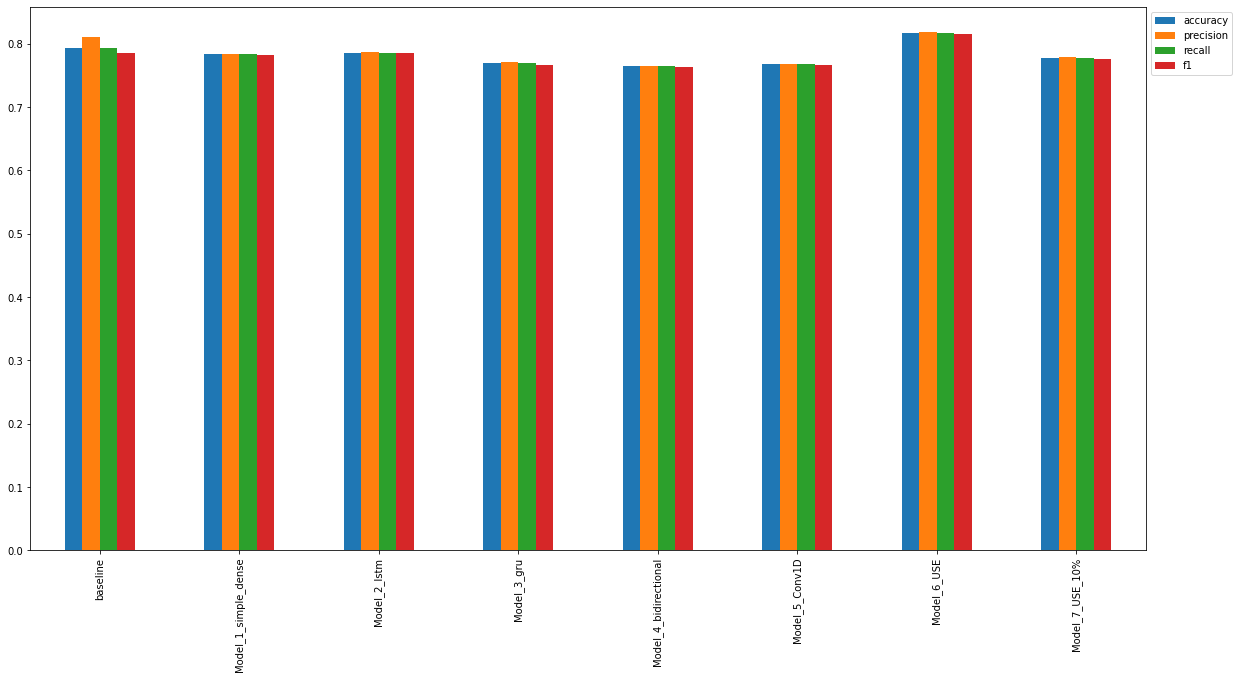

In [ ]:
# plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(20, 10)).legend(bbox_to_anchor=(1.0,1.0));

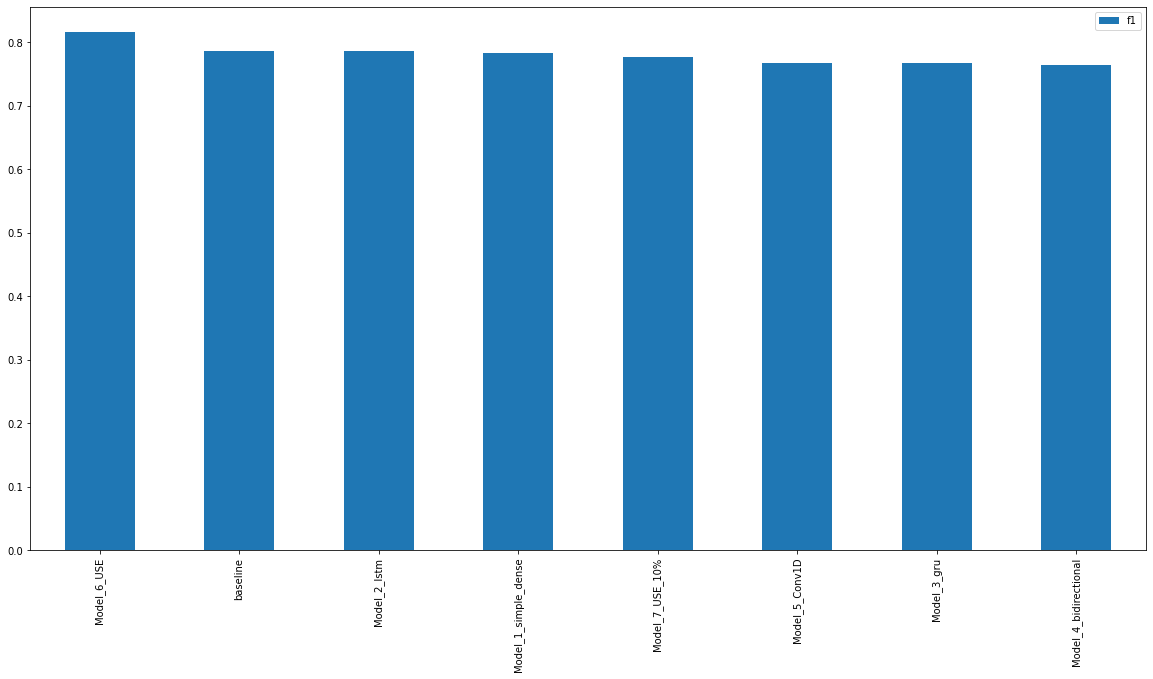

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(20, 10)).legend(bbox_to_anchor=(1.0,1.0));

## View training results on tensorboard

In [ ]:
!tensorboard dev upload --logdir ./model_logs \
  --name "Intro to NLP" \
  --description "7 NLP models" \
  --one_shot

2021-10-01 04:17:32.730700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 04:17:32.759914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 04:17:32.760420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Pol

In [ ]:
!tensorboard dev list

2021-10-01 04:22:14.169327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 04:22:14.177487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 04:22:14.177989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/SXZoedrFRzeuP3W0fOn50w/
	Name                 Intro to NLP
	Description          7 NLP models
	Id                   SXZoedrFRzeuP3W0fOn50w
	Created              2021-10-01 04:22:00 (21 seconds ago)
	Updated              2021-10-01 04:22:11 (10 seconds ago)
	Runs                 18
	Tags                 5

In [ ]:
# To delete an experiment
# !tensorboard dev delete --experiment_id apiowehrti9puhjckg

## Save and load model

1. HDF5 format
2. SavedModel format (tensorflow default)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# model_6.save('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6.h5')

In [ ]:
# Load model with custom Hub Layer (HDF5)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6.h5',
                                            custom_objects = {'KerasLayer': hub.KerasLayer})

In [ ]:
# Evaluate
loaded_model_6.evaluate(val_sentences, val_labels), model_6_results

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8150


([0.42640089988708496, 0.8149606585502625],
 {'accuracy': 0.8162729658792651,
  'f1': 0.8149987406062964,
  'precision': 0.8178880419707742,
  'recall': 0.8162729658792651})

In [ ]:
# model_6.save('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6')

In [ ]:
loaded_model_6_savedmodel_format = tf.keras.models.load_model('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6')

In [ ]:
loaded_model_6_savedmodel_format.evaluate(val_sentences, val_labels), model_6_results

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8150


([0.42640092968940735, 0.8149606585502625],
 {'accuracy': 0.8162729658792651,
  'f1': 0.8149987406062964,
  'precision': 0.8178880419707742,
  'recall': 0.8162729658792651})

## Find the most wrong examples

In [ ]:
# Import previously trained model
model_6_pretrained = tf.keras.models.load_model('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6')
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8150


[0.42640089988708496, 0.8149606585502625]

In [ ]:
# Make predictions
model_6_pretrained_preds_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.round(tf.squeeze(model_6_pretrained_preds_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_preds,
                       'pred_prob': tf.squeeze(model_6_pretrained_preds_probs)})
val_df

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.174587
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.809422
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986703
3,@camilacabello97 Internally and externally scr...,1,0.0,0.228871
4,Radiation emergency #preparedness starts with ...,1,1.0,0.781494
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.129127
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.131571
759,FedEx will no longer transport bioterror patho...,0,1.0,0.901434
760,Crack in the path where I wiped out this morni...,0,1.0,0.727700


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong.head() # false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.923310
759,FedEx will no longer transport bioterror patho...,0,1.0,0.901434
628,@noah_anyname That's where the concentration c...,0,1.0,0.883884
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.851173
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.846672


In [ ]:
most_wrong.tail() # false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.051746
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.047285
233,I get to smoke my shit in peace,1,0.0,0.046643
38,Why are you deluged with low self-image? Take ...,1,0.0,0.042447
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.034856


`0` = not disaster

`1` = disaster

In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text:\n{text}')
  print('-----\n')

Target: 0, Pred: 1.0, Prob: 0.9233100414276123
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
-----

Target: 0, Pred: 1.0, Prob: 0.9014342427253723
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
-----

Target: 0, Pred: 1.0, Prob: 0.8838835954666138
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
-----

Target: 0, Pred: 1.0, Prob: 0.8511731028556824
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
-----

Target: 0, Pred: 1.0, Prob: 0.8466724753379822
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY
-----

Target: 0, Pred: 1.0, Prob: 0.8403772711753845
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should liste

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
  print(f'Text:\n{text}')
  print('-----\n')

Target: 1, Pred: 0.0, Prob: 0.06952616572380066
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'
-----

Target: 1, Pred: 0.0, Prob: 0.06877453625202179
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets
-----

Target: 1, Pred: 0.0, Prob: 0.06749311834573746
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu
-----

Target: 1, Pred: 0.0, Prob: 0.0632554218173027
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy
-----

Target: 1, Pred: 0.0, Prob: 0.055508002638816833
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.
-----

Target: 1, Pred: 0.0, Prob: 0.05174563452601433
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren
-----

Target

## Make predictions on test data

In [ ]:
# Import previously trained model
model_6_pretrained = tf.keras.models.load_model('/content/drive/MyDrive/personal_project/Tensorflow/nlp_model_6.h5', 
                                                custom_objects = {'KerasLayer': hub.KerasLayer})
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4264 - accuracy: 0.8150


[0.42640092968940735, 0.8149606585502625]

In [ ]:
test_sentences = test_df['text'].to_numpy()

# Visualize random samples from test dataset
test_samples = np.random.choice(test_sentences, size=10)
for test_sample in test_samples:
  pred_probs = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_probs)
  print(f'test_sample: {test_sample}')
  print(f'Pred: {int(pred)}, Prob: {pred_probs}\n')

test_sample: I don't think it was. It was very realistic. Scully finally had him home and sfe and he wanted to go out into the danger. @HipsBeforeHands
Pred: 0, Prob: 0.20593376457691193

test_sample: forestservice : RT dhsscitech: #Firefighters run into burning buildingsÛÓwe work on #tech tÛ_ http://t.co/KybQcSvrZa) http://t.co/Ih49kyMsMp
Pred: 1, Prob: 0.7764796614646912

test_sample: Just watched Punisher: War Zone. IDK why everyone hates it. It is basically the best possible movie you could get out of Punisher
Pred: 0, Prob: 0.09130847454071045

test_sample: the bitches say im hot i say no bitch im blazing
Pred: 0, Prob: 0.05581830069422722

test_sample: Refugio oil spill may have been costlier bigger than projected: A Plains All American PipelineÛ_ http://t.co/sryaFqj9gZ #globetrottingwino
Pred: 1, Prob: 0.8898838758468628

test_sample: You cut me open and I keep bleeding. #BleedingLove #LeonaLewis #acapella #singer #canadiansingerÛ_ https://t.co/51pfEIlPNK
Pred: 0, Prob: 0.08

In [ ]:
test_pred_prob = model_6_pretrained.predict(test_sentences)
test_pred_prob = tf.squeeze(test_pred_prob)
test_pred = tf.round(test_pred_prob)
test_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
submission = pd.DataFrame(test_df['id'])
submission['target'] = tf.cast(test_pred, tf.int32)
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
submission.to_csv('/content/drive/MyDrive/personal_project/Tensorflow/nlp_kaggle_disaster_competition/submission.csv',
                  index=False)